In [1]:
!pip install opencv-python-headless

In [2]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from numpy import array
import cv2
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
import os

root='/content/gdrive/MyDrive/Colab Notebooks/Handwritten Signature Data/gray_scale'

for i in range(0,16):
  os.mkdir(os.path.join(root, f'signature_{i+1}'))

In [ ]:
# for renaming the folders and images

from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/gdrive/My Drive/Colab Notebooks/Handwritten Signature Data/data'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))  

In [ ]:
# Code for Gray scale
import os
import cv2 as cv2

import cv2
from google.colab.patches import cv2_imshow 

directory = "C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\data"


# gray_path= '/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Data_Augmentation'
gray_path= 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale'
def gray(directory):
  for root, dirs, files in os.walk(directory):
      for i, directory in enumerate(dirs): 
        print(i+1,directory)
        # print(gray_path,i)
        old_dir= os.path.join(root,directory)
       
        old_gray= os.path.join (gray_path,f'signature_{i+1}')
        # print(old_dir)
        print(old_gray)
        # new_dir= os.path.join(old_dir,f'signature_{i+1}')
        # print(new_dir)
        for j,file_name in enumerate((os.listdir(old_dir))):
            # print(j+1,file_name)
            # new_dir= os.path.join(old_dir,f'signature_{i+1}_{j+1}.jpg')
            # new_gray = os.path.join(old_gray,f'signature_{j+1}.jpg')
            # print(new_dir)
            # print(new_gray)
            filename= f'signature_{j+1}.jpg'
            # print(filename)
            img =  cv2.imread((os.path.join(old_dir,filename))) #image read for gray scale 
        
          
            
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            cv2.imwrite((os.path.join(old_gray,f'signature_{j+1}.jpg')),gray)
            # cv2_imshow(gray)
            # cv2.waitKey(0)
        

gray(directory)

In [4]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import Augmentor

# /content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Gray_scale

# p = Augmentor.Pipeline('/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Hand_Sign_Data')

p = Augmentor.Pipeline('C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale')  # gray image source path

In [ ]:
p.rotate(probability = 0.7,max_left_rotation=10,max_right_rotation=10)

p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

p.rotate270(probability=0.5)

p.flip_left_right(probability=0.5)

p.flip_top_bottom(probability=0.5)

p.zoom_random(probability=0.5, percentage_area=0.8)

# p.zoom(probability=0.3,min_factor=1.1,max_factor=1.6)

p.skew_left_right(0.5,0.3)

p.skew_top_bottom(0.5,0.5)
p.resize(1,519,276)
p.random_distortion(0.5,4,6,5) #probability, grid width, height,magnitude
p.shear(1,10,11) # prob, max_shear_left, max_shear_right


In [ ]:
p.sample(1600)

In [ ]:
# To rename Augmented Data

data_dir = 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale\output'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

In [6]:
pip install split-folders[full]

Note: you may need to restart the kernel to use updated packages.


In [5]:
import splitfolders
input_folder = "C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//gray_scale//output"
splitfolders.ratio (input_folder, output="C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_90_10/",
                seed=42, ratio=(.9,.1),
                group_prefix=None)

Copying files: 1600 files [01:38, 16.29 files/s]


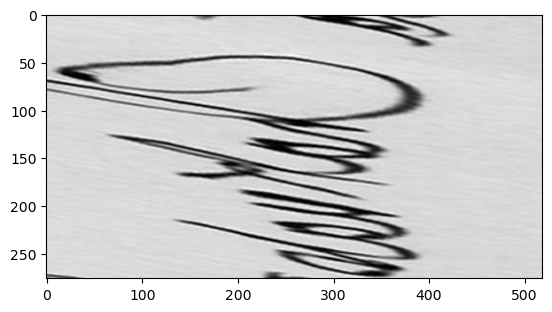

In [4]:
img = image.load_img('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_90_10//train//subject_1//signature_7.jpg')
plt.imshow(img)
# print(img.shape)

In [5]:
print(cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_90_10//train//subject_1//signature_7.jpg').shape)
cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_90_10//train//subject_1//signature_7.jpg')

(276, 519, 3)


array([[[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [217, 217, 217],
        [217, 217, 217],
        [217, 217, 217]],

       [[222, 222, 222],
        [222, 222, 222],
        [222, 222, 222],
        ...,
        [220, 220, 220],
        [220, 220, 220],
        [220, 220, 220]],

       [[223, 223, 223],
        [223, 223, 223],
        [223, 223, 223],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]],

       ...,

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 95,  95,  95],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       [[111, 111, 111],
        [113, 113, 113],
        [115, 115, 115],
        ...,
        [216, 216, 216],
        [216, 216, 216],
        [217, 217, 217]],

       [[105, 105, 105],
        [112, 112, 112],
        [123, 123, 123],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]]

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
#RUN FROM HERE

batch_size=50 #20  #15

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)



In [9]:
train_generator=train_datagen.flow_from_directory('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_90_10//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

# same generator for validation data

validation_generator=test_datagen.flow_from_directory("C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_90_10//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

Found 1431 images belonging to 16 classes.
Found 169 images belonging to 16 classes.


In [10]:
num_samples = len(train_generator)
x_train = []
y_train = []
for i in range(num_samples):
    x_batch, y_batch = next(train_generator)
    x_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

num_samples = len(validation_generator)
x_val = []
y_val = []
for i in range(num_samples):
    x_batch, y_batch = next(validation_generator)
    x_val.append(x_batch)
    y_val.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)


## <font color = 'Blue'>25 Epoch

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=25, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/25
45/45 [==============================] - 23s 410ms/step - loss: 2.7983 - accuracy: 0.0622 - val_loss: 2.7662 - val_accuracy: 0.0651
Epoch 2/25
45/45 [==============================] - 18s 410ms/step - loss: 2.7674 - accuracy: 0.0727 - val_loss: 2.7625 - val_accuracy: 0.0769
Epoch 3/25
45/45 [==============================] - 19s 415ms/step - loss: 2.7548 - accuracy: 0.0894 - val_loss: 2.7623 - val_accuracy: 0.0710
Epoch 4/25
45/45 [==============================] - 19s 426ms/step - loss: 2.7595 - accuracy: 0.0860 - val_loss: 2.7594 - val_accuracy: 0.0888
Epoch 5/25
45/45 [==============================] - 20s 438ms/step - loss: 2.7477 - accuracy: 0.0811 - val_loss: 2.7657 - val_accuracy: 0.0592
Epoch 6/25
45/45 [==============================] - 18s 398ms/step - loss: 2.7457 - accuracy: 0.0992 - val_loss: 2.7630 - val_accuracy: 0.0710
Epoch 7/25
45/45 [==============================] - 18s 392ms/step - loss: 2.7329 - accuracy: 0.0964 - val_loss: 2.7451 - val_accuracy: 0.1302

In [35]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

6/6 [==============================] - 1s 167ms/step - loss: 2.4971 - accuracy: 0.1598
Test Loss: 2.497122049331665
Test Accuracy: 0.15976330637931824
6/6 [==============================] - 3s 174ms/step


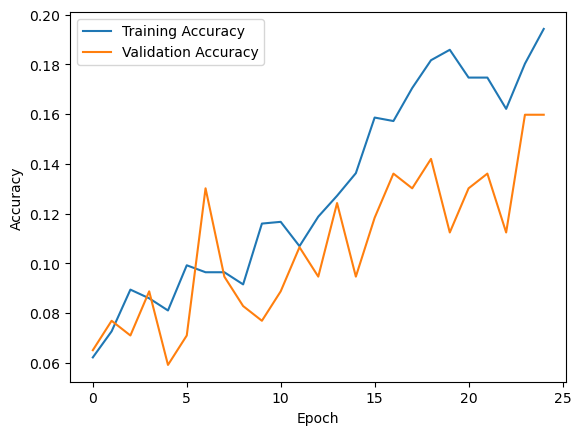

In [36]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

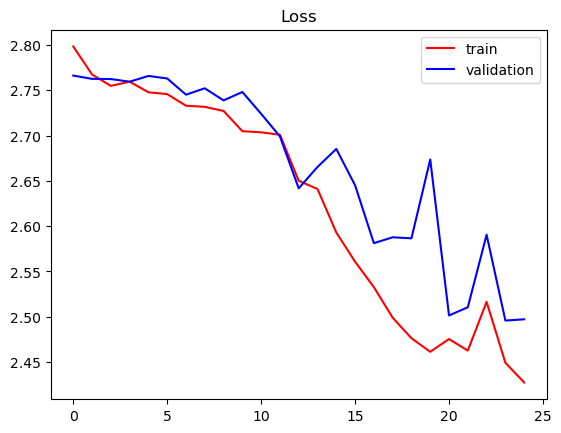

In [37]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [38]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

6/6 [==============================] - 1s 158ms/step
Confusion Matrix:
[[0 0 0 1 0 0 1 1 3 2 0 0 0 0 0 0]
 [0 3 0 1 0 0 2 2 0 0 4 0 0 0 0 0]
 [0 1 2 1 1 0 0 0 1 0 5 1 0 0 0 0]
 [0 1 0 7 0 0 0 2 0 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 3 1 2 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 1 5 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 5 0 5 0 1 0 0 0 0 0]
 [0 0 0 7 0 0 0 3 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 4 0 2 0 0 0 0 0]
 [0 3 0 0 1 0 1 2 0 0 3 0 0 0 0 0]
 [0 4 0 2 0 0 0 1 0 0 3 1 0 0 0 0]
 [0 4 0 3 0 0 0 3 0 0 1 0 0 0 0 2]
 [0 2 0 0 0 0 1 2 3 0 2 0 0 0 0 0]
 [0 0 0 7 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 3 1 0 1 0 3 1 0 1 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 3 1 4 1 0 0 0 0]]


6/6 [==============================] - 1s 156ms/step


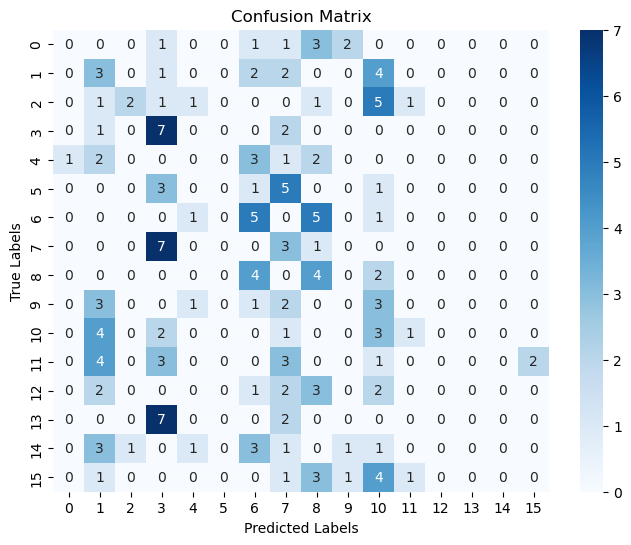

In [39]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)



Class 0: TPR = 0.0000, FPR = 0.0062, TNR = 0.9938, FNR = 1.0000
Class 1: TPR = 0.2500, FPR = 0.1338, TNR = 0.8662, FNR = 0.7500
Class 2: TPR = 0.1667, FPR = 0.0064, TNR = 0.9936, FNR = 0.8333
Class 3: TPR = 0.7000, FPR = 0.1572, TNR = 0.8428, FNR = 0.3000
Class 4: TPR = 0.0000, FPR = 0.0250, TNR = 0.9750, FNR = 1.0000
Class 5: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 6: TPR = 0.4167, FPR = 0.1019, TNR = 0.8981, FNR = 0.5833
Class 7: TPR = 0.2727, FPR = 0.1456, TNR = 0.8544, FNR = 0.7273
Class 8: TPR = 0.4000, FPR = 0.1132, TNR = 0.8868, FNR = 0.6000
Class 9: TPR = 0.0000, FPR = 0.0252, TNR = 0.9748, FNR = 1.0000
Class 10: TPR = 0.2727, FPR = 0.1519, TNR = 0.8481, FNR = 0.7273
Class 11: TPR = 0.0000, FPR = 0.0192, TNR = 0.9808, FNR = 1.0000
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 15: TPR = 0.0000, FPR = 0.012

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6532\575612109.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6532\575612109.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


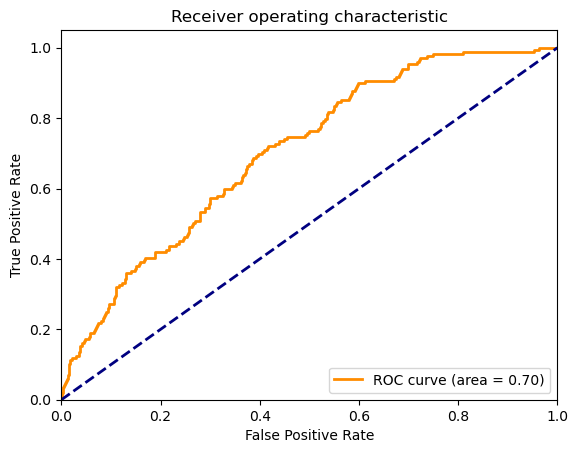

In [41]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

6/6 [==============================] - 1s 169ms/step - loss: 2.4971 - accuracy: 0.1598
Test Loss: 2.497122049331665
Test Accuracy: 0.15976330637931824
6/6 [==============================] - 1s 162ms/step
AUC for class 0: 0.4744
AUC for class 1: 0.6258
AUC for class 2: 0.4469
AUC for class 3: 0.9308
AUC for class 4: 0.6674
AUC for class 5: 0.6881
AUC for class 6: 0.8243
AUC for class 7: 0.8067
AUC for class 8: 0.9050
AUC for class 9: 0.4943
AUC for class 10: 0.5104
AUC for class 11: 0.5986
AUC for class 12: 0.6069
AUC for class 13: 0.8750
AUC for class 14: 0.5880
AUC for class 15: 0.6041


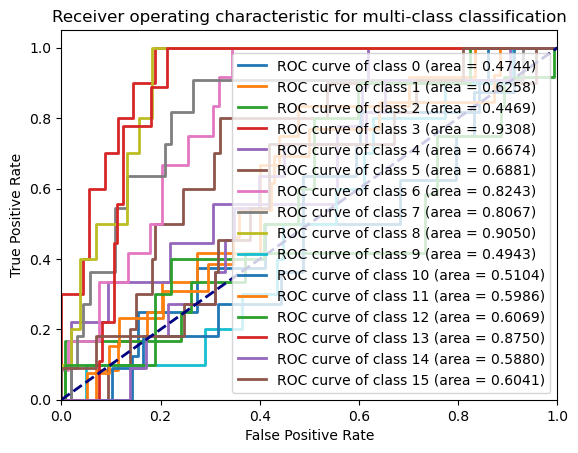

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## <font color = 'Blue'>30 Epoch

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=30, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/30
45/45 [==============================] - 31s 572ms/step - loss: 2.7968 - accuracy: 0.0608 - val_loss: 2.7691 - val_accuracy: 0.0769
Epoch 2/30
45/45 [==============================] - 21s 467ms/step - loss: 2.7683 - accuracy: 0.0699 - val_loss: 2.7709 - val_accuracy: 0.0651
Epoch 3/30
45/45 [==============================] - 22s 481ms/step - loss: 2.7670 - accuracy: 0.0797 - val_loss: 2.7637 - val_accuracy: 0.0651
Epoch 4/30
45/45 [==============================] - 21s 470ms/step - loss: 2.7492 - accuracy: 0.0894 - val_loss: 2.7733 - val_accuracy: 0.0769
Epoch 5/30
45/45 [==============================] - 21s 472ms/step - loss: 2.7502 - accuracy: 0.0839 - val_loss: 2.7614 - val_accuracy: 0.0828
Epoch 6/30
45/45 [==============================] - 21s 468ms/step - loss: 2.7401 - accuracy: 0.0936 - val_loss: 2.7533 - val_accuracy: 0.0710
Epoch 7/30
45/45 [==============================] - 20s 453ms/step - loss: 2.7255 - accuracy: 0.0971 - val_loss: 2.7491 - val_accuracy: 0.0769

In [44]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

6/6 [==============================] - 1s 197ms/step - loss: 2.5414 - accuracy: 0.1657
Test Loss: 2.541405200958252
Test Accuracy: 0.16568046808242798
6/6 [==============================] - 3s 205ms/step


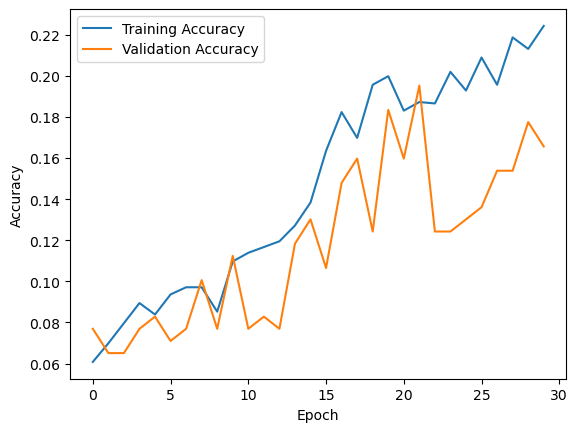

In [45]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

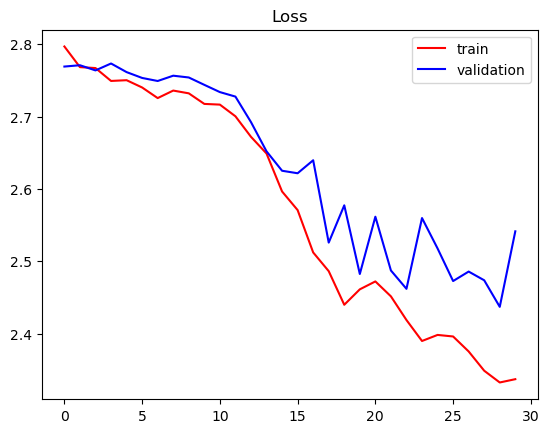

In [46]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [47]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

6/6 [==============================] - 1s 205ms/step
Confusion Matrix:
[[ 0  0  1  0  0  0  5  0  0  1  0  1  0  0  0  0]
 [ 0  1  3  0  0  0  3  0  0  0  0  3  0  0  2  0]
 [ 0  0  4  1  0  0  6  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  4  0  0  0  3  0  0  0  2  0  0  0  0]
 [ 0  0  4  0  0  0  4  0  1  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  2  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  2  0  0  0  0  0  0  0]
 [ 0  0  1  3  0  0  1  1  0  0  0  4  0  0  1  0]
 [ 0  0  0  0  0  0  6  0  4  0  0  0  0  0  0  0]
 [ 0  1  4  0  0  0  4  0  0  0  0  0  0  0  1  0]
 [ 0  2  3  1  0  0  2  0  0  1  0  0  0  0  2  0]
 [ 0  0  3  1  0  0  0  0  2  0  0  3  0  0  4  0]
 [ 0  1  3  0  0  0  5  0  1  0  0  0  0  0  0  0]
 [ 0  2  1  2  0  0  0  1  0  0  0  3  0  0  0  0]
 [ 0  0  3  0  0  0  6  0  0  0  1  0  0  0  1  0]
 [ 0  0  1  0  0  0  6  0  2  0  0  0  0  0  2  0]]


6/6 [==============================] - 1s 191ms/step


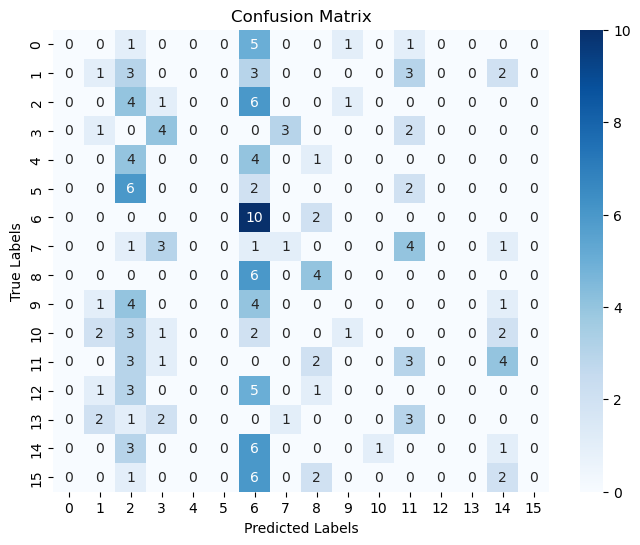

In [48]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [49]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)



Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.0833, FPR = 0.0446, TNR = 0.9554, FNR = 0.9167
Class 2: TPR = 0.3333, FPR = 0.2102, TNR = 0.7898, FNR = 0.6667
Class 3: TPR = 0.4000, FPR = 0.0503, TNR = 0.9497, FNR = 0.6000
Class 4: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 5: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 6: TPR = 0.8333, FPR = 0.3185, TNR = 0.6815, FNR = 0.1667
Class 7: TPR = 0.0909, FPR = 0.0253, TNR = 0.9747, FNR = 0.9091
Class 8: TPR = 0.4000, FPR = 0.0503, TNR = 0.9497, FNR = 0.6000
Class 9: TPR = 0.0000, FPR = 0.0189, TNR = 0.9811, FNR = 1.0000
Class 10: TPR = 0.0000, FPR = 0.0063, TNR = 0.9937, FNR = 1.0000
Class 11: TPR = 0.2308, FPR = 0.0962, TNR = 0.9038, FNR = 0.7692
Class 12: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0909, FPR = 0.0759, TNR = 0.9241, FNR = 0.9091
Class 15: TPR = 0.0000, FPR = 0.000

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6532\575612109.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6532\575612109.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


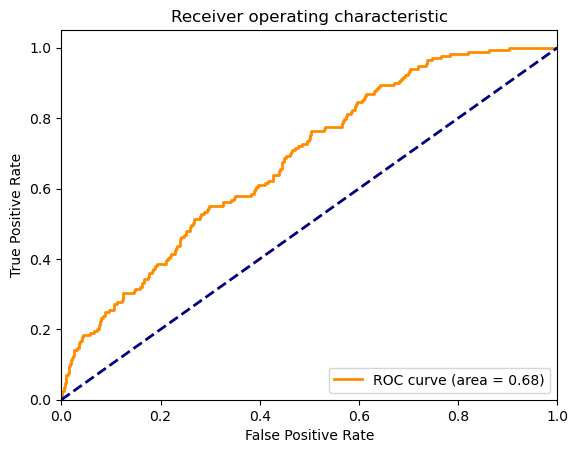

In [50]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

6/6 [==============================] - 1s 212ms/step - loss: 2.5414 - accuracy: 0.1657
Test Loss: 2.541405200958252
Test Accuracy: 0.16568046808242798
6/6 [==============================] - 1s 223ms/step
AUC for class 0: 0.3641
AUC for class 1: 0.6295
AUC for class 2: 0.5993
AUC for class 3: 0.9522
AUC for class 4: 0.7056
AUC for class 5: 0.6484
AUC for class 6: 0.8710
AUC for class 7: 0.8119
AUC for class 8: 0.9340
AUC for class 9: 0.4830
AUC for class 10: 0.6208
AUC for class 11: 0.5764
AUC for class 12: 0.6346
AUC for class 13: 0.8764
AUC for class 14: 0.5414
AUC for class 15: 0.6433


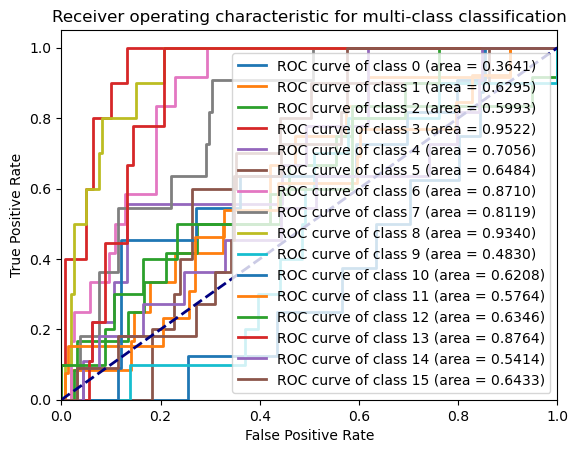

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## <font color = 'Blue'>35 Epoch

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=35, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/35
45/45 [==============================] - 28s 521ms/step - loss: 2.7949 - accuracy: 0.0608 - val_loss: 2.7641 - val_accuracy: 0.1065
Epoch 2/35
45/45 [==============================] - 21s 463ms/step - loss: 2.7663 - accuracy: 0.0825 - val_loss: 2.7550 - val_accuracy: 0.1183
Epoch 3/35
45/45 [==============================] - 21s 460ms/step - loss: 2.7556 - accuracy: 0.0832 - val_loss: 2.7515 - val_accuracy: 0.1183
Epoch 4/35
45/45 [==============================] - 21s 459ms/step - loss: 2.7620 - accuracy: 0.0881 - val_loss: 2.7561 - val_accuracy: 0.1183
Epoch 5/35
45/45 [==============================] - 21s 459ms/step - loss: 2.7519 - accuracy: 0.0832 - val_loss: 2.7456 - val_accuracy: 0.0651
Epoch 6/35
45/45 [==============================] - 20s 450ms/step - loss: 2.7473 - accuracy: 0.0929 - val_loss: 2.7604 - val_accuracy: 0.0947
Epoch 7/35
45/45 [==============================] - 21s 464ms/step - loss: 2.7429 - accuracy: 0.0901 - val_loss: 2.7506 - val_accuracy: 0.0888

In [53]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

6/6 [==============================] - 1s 151ms/step - loss: 2.5398 - accuracy: 0.1479
Test Loss: 2.539828062057495
Test Accuracy: 0.14792899787425995
6/6 [==============================] - 2s 173ms/step


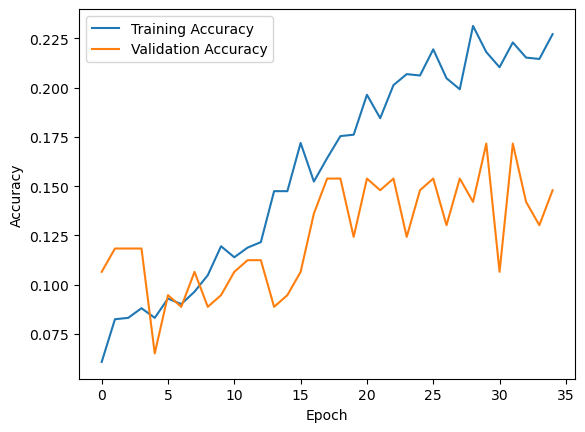

In [54]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

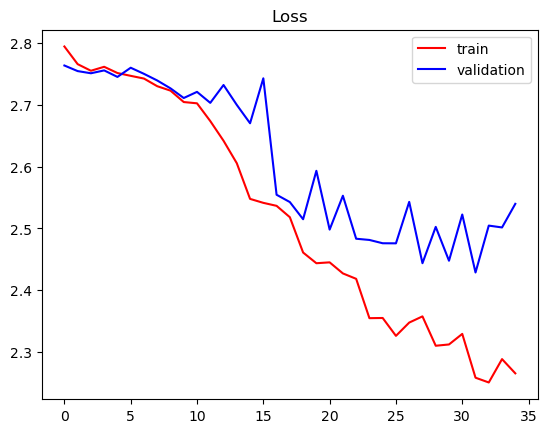

In [55]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [56]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

6/6 [==============================] - 1s 189ms/step
Confusion Matrix:
[[0 0 0 0 0 0 1 0 4 0 0 1 0 0 1 1]
 [0 2 0 0 0 0 0 1 1 1 1 2 0 0 3 1]
 [0 0 0 1 0 0 3 0 3 0 1 0 0 0 2 2]
 [0 1 0 4 0 0 0 3 0 0 0 2 0 0 0 0]
 [0 0 1 0 0 0 0 1 5 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 1 0 0 0 2 0 0 4 2]
 [0 0 0 0 0 0 1 1 9 0 0 0 0 0 0 1]
 [0 0 0 3 0 0 0 1 1 0 0 5 0 0 0 1]
 [0 0 0 0 0 0 1 0 9 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 2 0 1 0 1 0 3 2]
 [0 1 2 1 1 0 1 0 0 0 2 0 1 0 1 1]
 [1 0 1 1 0 0 0 0 2 0 2 2 0 0 4 0]
 [0 0 0 0 0 0 2 0 4 0 1 0 1 0 1 1]
 [0 1 0 2 0 1 0 2 0 0 0 3 0 0 0 0]
 [0 0 1 0 0 0 0 0 5 0 1 1 2 0 1 0]
 [0 0 0 0 0 0 1 0 6 0 0 0 0 0 2 2]]


6/6 [==============================] - 1s 152ms/step


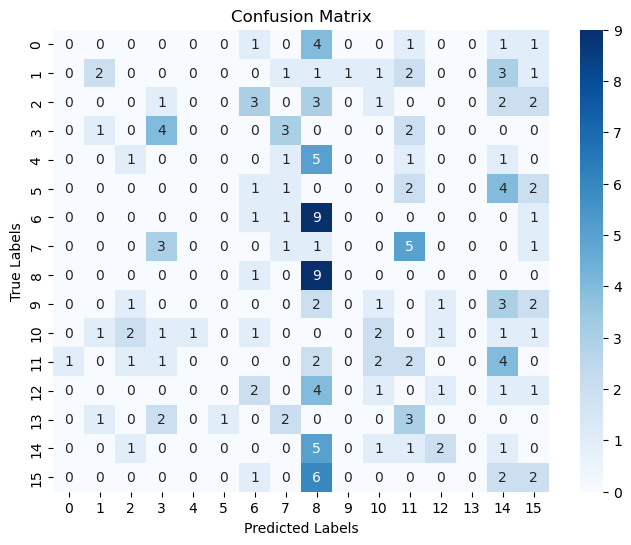

In [57]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0062, TNR = 0.9938, FNR = 1.0000
Class 1: TPR = 0.1667, FPR = 0.0191, TNR = 0.9809, FNR = 0.8333
Class 2: TPR = 0.0000, FPR = 0.0382, TNR = 0.9618, FNR = 1.0000
Class 3: TPR = 0.4000, FPR = 0.0503, TNR = 0.9497, FNR = 0.6000
Class 4: TPR = 0.0000, FPR = 0.0063, TNR = 0.9938, FNR = 1.0000
Class 5: TPR = 0.0000, FPR = 0.0063, TNR = 0.9937, FNR = 1.0000
Class 6: TPR = 0.0833, FPR = 0.0637, TNR = 0.9363, FNR = 0.9167
Class 7: TPR = 0.0909, FPR = 0.0570, TNR = 0.9430, FNR = 0.9091
Class 8: TPR = 0.9000, FPR = 0.2642, TNR = 0.7358, FNR = 0.1000
Class 9: TPR = 0.0000, FPR = 0.0063, TNR = 0.9937, FNR = 1.0000
Class 10: TPR = 0.1818, FPR = 0.0443, TNR = 0.9557, FNR = 0.8182
Class 11: TPR = 0.1538, FPR = 0.1090, TNR = 0.8910, FNR = 0.8462
Class 12: TPR = 0.1000, FPR = 0.0252, TNR = 0.9748, FNR = 0.9000
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0909, FPR = 0.1392, TNR = 0.8608, FNR = 0.9091
Class 15: TPR = 0.1818, FPR = 0.075

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6532\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6532\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


In [59]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)



Class 0: TPR = 0.0000, FPR = 0.0062, TNR = 0.9938, FNR = 1.0000
Class 1: TPR = 0.1667, FPR = 0.0191, TNR = 0.9809, FNR = 0.8333
Class 2: TPR = 0.0000, FPR = 0.0382, TNR = 0.9618, FNR = 1.0000
Class 3: TPR = 0.4000, FPR = 0.0503, TNR = 0.9497, FNR = 0.6000
Class 4: TPR = 0.0000, FPR = 0.0063, TNR = 0.9938, FNR = 1.0000
Class 5: TPR = 0.0000, FPR = 0.0063, TNR = 0.9937, FNR = 1.0000
Class 6: TPR = 0.0833, FPR = 0.0637, TNR = 0.9363, FNR = 0.9167
Class 7: TPR = 0.0909, FPR = 0.0570, TNR = 0.9430, FNR = 0.9091
Class 8: TPR = 0.9000, FPR = 0.2642, TNR = 0.7358, FNR = 0.1000
Class 9: TPR = 0.0000, FPR = 0.0063, TNR = 0.9937, FNR = 1.0000
Class 10: TPR = 0.1818, FPR = 0.0443, TNR = 0.9557, FNR = 0.8182
Class 11: TPR = 0.1538, FPR = 0.1090, TNR = 0.8910, FNR = 0.8462
Class 12: TPR = 0.1000, FPR = 0.0252, TNR = 0.9748, FNR = 0.9000
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0909, FPR = 0.1392, TNR = 0.8608, FNR = 0.9091
Class 15: TPR = 0.1818, FPR = 0.075

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6532\575612109.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6532\575612109.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


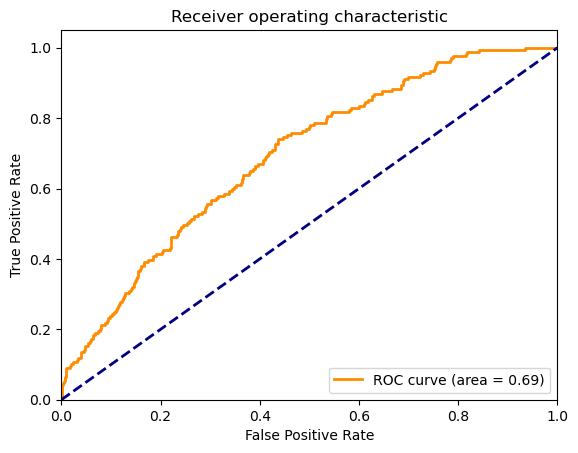

In [60]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

6/6 [==============================] - 1s 176ms/step - loss: 2.5398 - accuracy: 0.1479
Test Loss: 2.539828062057495
Test Accuracy: 0.14792899787425995
6/6 [==============================] - 1s 152ms/step
AUC for class 0: 0.4604
AUC for class 1: 0.6730
AUC for class 2: 0.5249
AUC for class 3: 0.9289
AUC for class 4: 0.6785
AUC for class 5: 0.6346
AUC for class 6: 0.8620
AUC for class 7: 0.7929
AUC for class 8: 0.9516
AUC for class 9: 0.4063
AUC for class 10: 0.6272
AUC for class 11: 0.6297
AUC for class 12: 0.6881
AUC for class 13: 0.8854
AUC for class 14: 0.6692
AUC for class 15: 0.6502


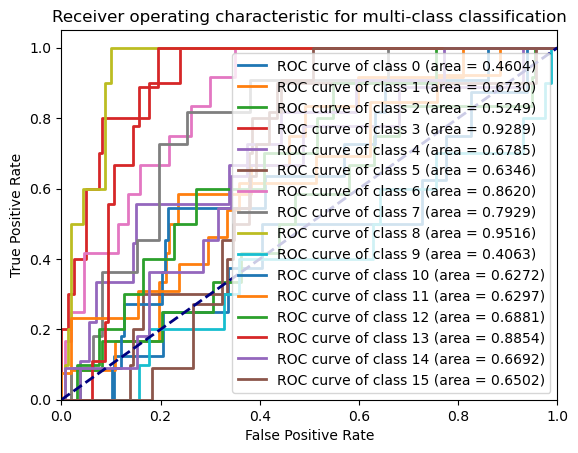

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## <font color = 'Blue'>40 Epoch

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=40, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/40
45/45 [==============================] - 26s 474ms/step - loss: 2.7926 - accuracy: 0.0741 - val_loss: 2.7658 - val_accuracy: 0.0592
Epoch 2/40
45/45 [==============================] - 20s 445ms/step - loss: 2.7718 - accuracy: 0.0734 - val_loss: 2.7652 - val_accuracy: 0.0769
Epoch 3/40
45/45 [==============================] - 21s 462ms/step - loss: 2.7617 - accuracy: 0.0678 - val_loss: 2.7613 - val_accuracy: 0.0828
Epoch 4/40
45/45 [==============================] - 21s 465ms/step - loss: 2.7636 - accuracy: 0.0811 - val_loss: 2.7585 - val_accuracy: 0.0947
Epoch 5/40
45/45 [==============================] - 20s 456ms/step - loss: 2.7528 - accuracy: 0.0943 - val_loss: 2.7536 - val_accuracy: 0.0828
Epoch 6/40
45/45 [==============================] - 21s 457ms/step - loss: 2.7494 - accuracy: 0.0922 - val_loss: 2.7546 - val_accuracy: 0.0828
Epoch 7/40
45/45 [==============================] - 20s 441ms/step - loss: 2.7366 - accuracy: 0.0978 - val_loss: 2.7532 - val_accuracy: 0.0710

In [63]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

6/6 [==============================] - 3s 320ms/step - loss: 2.4680 - accuracy: 0.1479
Test Loss: 2.467987537384033
Test Accuracy: 0.14792899787425995
6/6 [==============================] - 9s 322ms/step


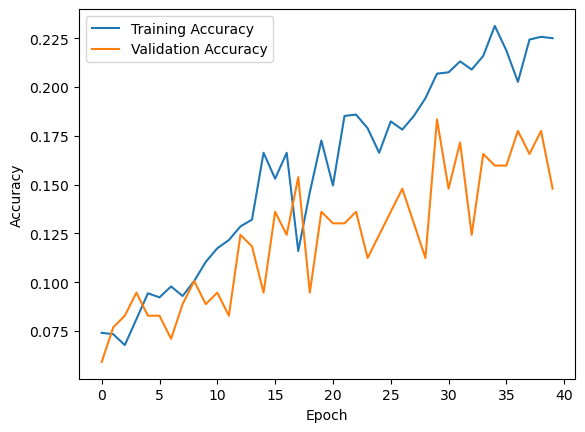

In [64]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

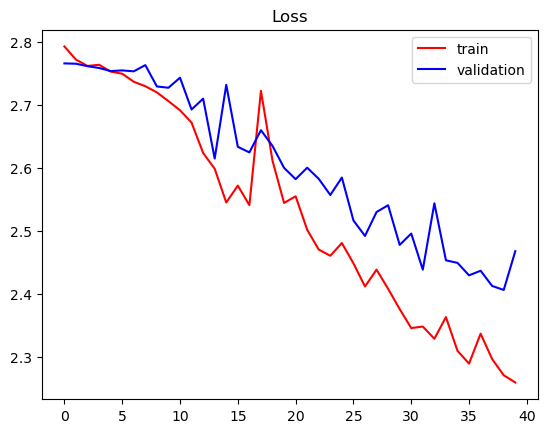

In [65]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [66]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

6/6 [==============================] - 3s 324ms/step
Confusion Matrix:
[[0 1 1 2 0 0 1 0 2 0 0 0 0 0 0 1]
 [0 6 1 3 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 3 1 2 0 0 0 0 0 0 0 3 2 0 0 1]
 [0 0 0 9 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 4 0 0 0 1 2 0 0]
 [0 1 0 7 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 6 0 0 0 3 0 0 1]
 [0 0 0 9 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 3 0 5 0 0 0 1 0 0 1]
 [0 3 1 2 0 0 0 1 0 0 0 3 0 0 0 0]
 [0 5 0 3 0 0 0 2 0 0 0 1 0 0 0 0]
 [0 4 2 4 0 0 0 2 0 0 0 0 1 0 0 0]
 [0 1 0 2 0 0 0 1 2 0 0 0 2 0 0 2]
 [0 0 0 8 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 4 0 1 0 0 1 1 0 0 0 0 1 0 0 3]
 [0 2 1 1 0 0 0 0 2 0 1 2 2 0 0 0]]


6/6 [==============================] - 3s 355ms/step


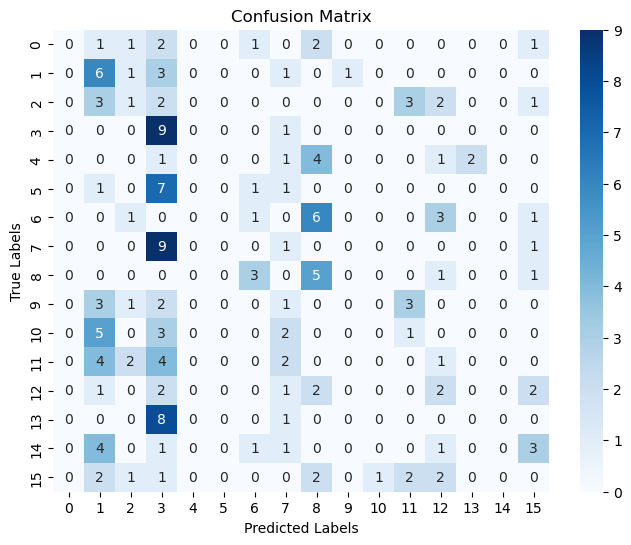

In [67]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [68]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)



Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.5000, FPR = 0.1529, TNR = 0.8471, FNR = 0.5000
Class 2: TPR = 0.0833, FPR = 0.0446, TNR = 0.9554, FNR = 0.9167
Class 3: TPR = 0.9000, FPR = 0.2830, TNR = 0.7170, FNR = 0.1000
Class 4: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 5: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 6: TPR = 0.0833, FPR = 0.0382, TNR = 0.9618, FNR = 0.9167
Class 7: TPR = 0.0909, FPR = 0.0759, TNR = 0.9241, FNR = 0.9091
Class 8: TPR = 0.5000, FPR = 0.1006, TNR = 0.8994, FNR = 0.5000
Class 9: TPR = 0.0000, FPR = 0.0063, TNR = 0.9937, FNR = 1.0000
Class 10: TPR = 0.0000, FPR = 0.0063, TNR = 0.9937, FNR = 1.0000
Class 11: TPR = 0.0000, FPR = 0.0577, TNR = 0.9423, FNR = 1.0000
Class 12: TPR = 0.2000, FPR = 0.0692, TNR = 0.9308, FNR = 0.8000
Class 13: TPR = 0.0000, FPR = 0.0125, TNR = 0.9875, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 15: TPR = 0.0000, FPR = 0.063

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6532\575612109.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6532\575612109.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


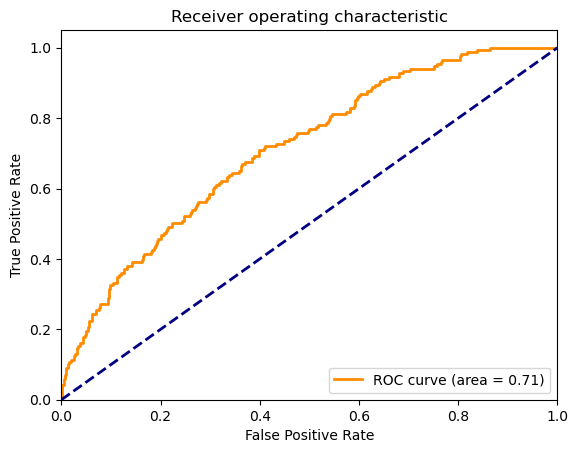

In [69]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

6/6 [==============================] - 2s 332ms/step - loss: 2.4680 - accuracy: 0.1479
Test Loss: 2.467987537384033
Test Accuracy: 0.14792899787425995
6/6 [==============================] - 3s 364ms/step
AUC for class 0: 0.4092
AUC for class 1: 0.6645
AUC for class 2: 0.4761
AUC for class 3: 0.9296
AUC for class 4: 0.6444
AUC for class 5: 0.7233
AUC for class 6: 0.8753
AUC for class 7: 0.7825
AUC for class 8: 0.9327
AUC for class 9: 0.4748
AUC for class 10: 0.5736
AUC for class 11: 0.6361
AUC for class 12: 0.7031
AUC for class 13: 0.8944
AUC for class 14: 0.5754
AUC for class 15: 0.6082


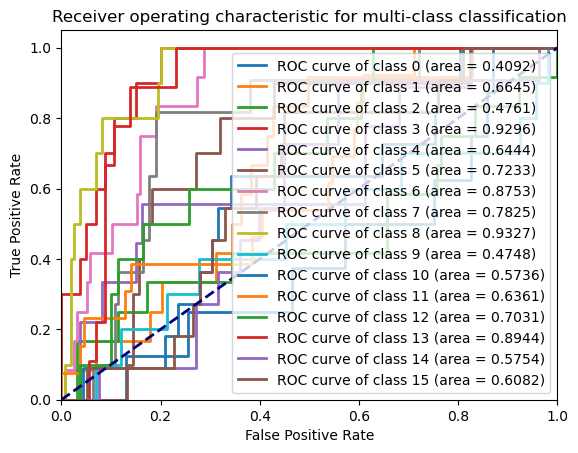

In [70]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=80, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/80
45/45 [==============================] - 95s 1s/step - loss: 2.8096 - accuracy: 0.0601 - val_loss: 2.7854 - val_accuracy: 0.0710
Epoch 2/80
45/45 [==============================] - 46s 1s/step - loss: 2.7702 - accuracy: 0.0678 - val_loss: 2.7645 - val_accuracy: 0.0769
Epoch 3/80
45/45 [==============================] - 55s 1s/step - loss: 2.7664 - accuracy: 0.0825 - val_loss: 2.7634 - val_accuracy: 0.0828
Epoch 4/80
45/45 [==============================] - 54s 1s/step - loss: 2.7603 - accuracy: 0.0860 - val_loss: 2.7640 - val_accuracy: 0.0769
Epoch 5/80
45/45 [==============================] - 58s 1s/step - loss: 2.7585 - accuracy: 0.0874 - val_loss: 2.7676 - val_accuracy: 0.0355
Epoch 6/80
45/45 [==============================] - 57s 1s/step - loss: 2.7551 - accuracy: 0.0881 - val_loss: 2.7626 - val_accuracy: 0.0828
Epoch 7/80
45/45 [==============================] - 60s 1s/step - loss: 2.7454 - accuracy: 0.1041 - val_loss: 2.7593 - val_accuracy: 0.0473
Epoch 8/80
45/45 [==

In [72]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

6/6 [==============================] - 6s 562ms/step - loss: 2.4935 - accuracy: 0.1538
Test Loss: 2.4934589862823486
Test Accuracy: 0.1538461595773697
6/6 [==============================] - 23s 639ms/step


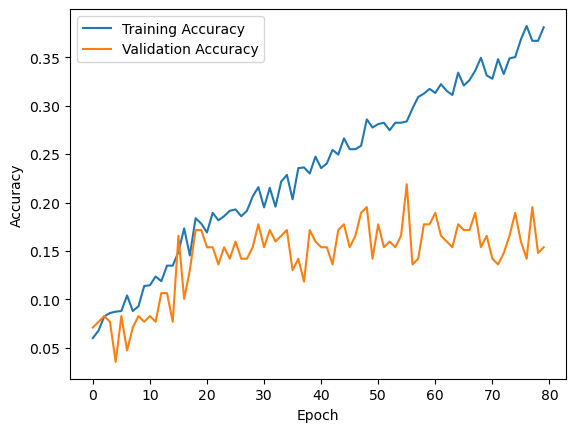

In [73]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

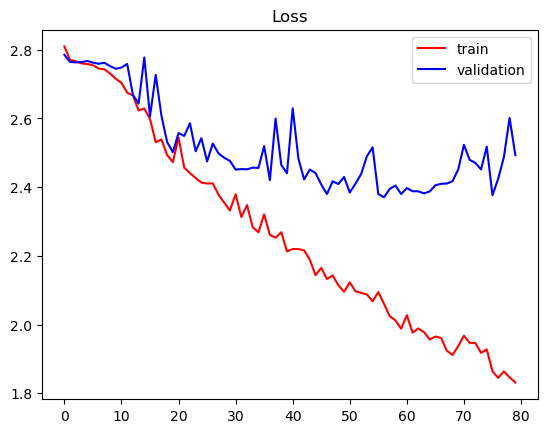

In [74]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [75]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

6/6 [==============================] - 7s 603ms/step
Confusion Matrix:
[[0 0 0 0 0 0 0 0 1 0 1 3 0 0 1 2]
 [0 3 1 0 0 0 0 0 0 2 1 2 0 1 0 2]
 [0 1 0 0 1 0 1 0 0 0 0 4 0 1 0 4]
 [0 0 0 4 0 0 0 1 0 0 0 0 0 4 1 0]
 [0 0 1 0 0 0 0 0 2 1 0 2 0 0 0 3]
 [0 0 0 0 0 1 0 0 0 0 0 2 0 3 2 2]
 [0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 4]
 [0 0 0 4 0 0 0 0 1 0 0 3 0 2 0 1]
 [0 0 0 0 0 0 4 0 4 0 0 0 0 0 0 2]
 [0 2 1 0 0 0 0 0 0 0 0 2 0 0 3 2]
 [0 2 2 1 1 0 0 0 0 1 0 2 0 0 1 1]
 [0 2 2 0 0 0 0 0 0 0 0 4 0 1 2 2]
 [0 1 1 0 0 0 0 0 2 0 0 1 2 0 0 3]
 [0 1 1 3 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 1 0 0 0 0 1 2 3 0 0 0 4]
 [0 0 0 0 1 0 1 0 2 0 0 4 0 0 1 2]]


6/6 [==============================] - 5s 644ms/step


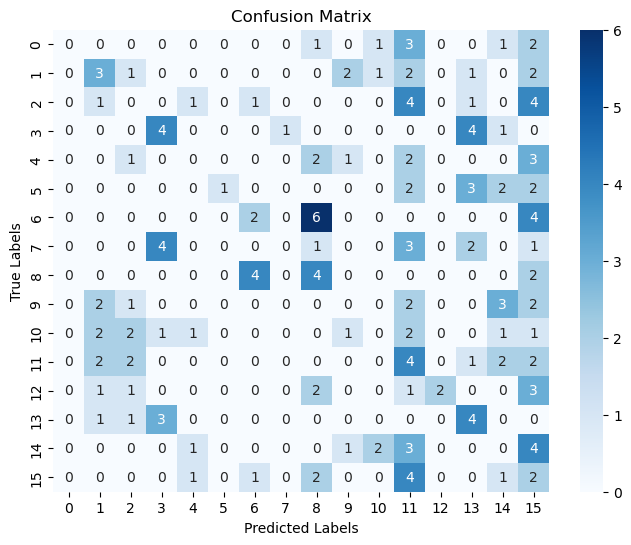

In [76]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [77]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)



Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.2500, FPR = 0.0573, TNR = 0.9427, FNR = 0.7500
Class 2: TPR = 0.0000, FPR = 0.0573, TNR = 0.9427, FNR = 1.0000
Class 3: TPR = 0.4000, FPR = 0.0503, TNR = 0.9497, FNR = 0.6000
Class 4: TPR = 0.0000, FPR = 0.0250, TNR = 0.9750, FNR = 1.0000
Class 5: TPR = 0.1000, FPR = 0.0000, TNR = 1.0000, FNR = 0.9000
Class 6: TPR = 0.1667, FPR = 0.0382, TNR = 0.9618, FNR = 0.8333
Class 7: TPR = 0.0000, FPR = 0.0063, TNR = 0.9937, FNR = 1.0000
Class 8: TPR = 0.4000, FPR = 0.0881, TNR = 0.9119, FNR = 0.6000
Class 9: TPR = 0.0000, FPR = 0.0314, TNR = 0.9686, FNR = 1.0000
Class 10: TPR = 0.0000, FPR = 0.0253, TNR = 0.9747, FNR = 1.0000
Class 11: TPR = 0.3077, FPR = 0.1795, TNR = 0.8205, FNR = 0.6923
Class 12: TPR = 0.2000, FPR = 0.0000, TNR = 1.0000, FNR = 0.8000
Class 13: TPR = 0.4444, FPR = 0.0750, TNR = 0.9250, FNR = 0.5556
Class 14: TPR = 0.0000, FPR = 0.0696, TNR = 0.9304, FNR = 1.0000
Class 15: TPR = 0.1818, FPR = 0.202

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6532\575612109.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6532\575612109.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


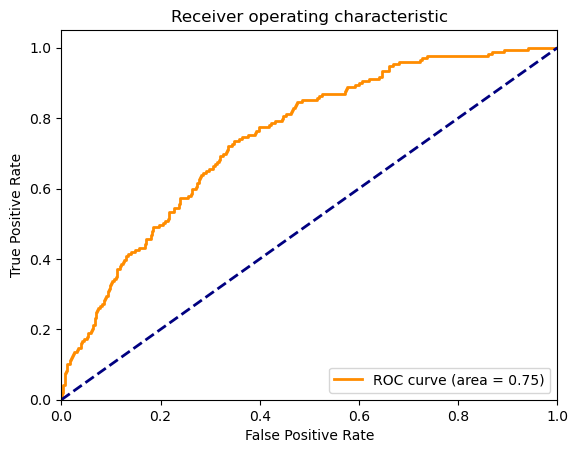

In [78]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

6/6 [==============================] - 6s 571ms/step - loss: 2.4935 - accuracy: 0.1538
Test Loss: 2.4934589862823486
Test Accuracy: 0.1538461595773697
6/6 [==============================] - 4s 535ms/step
AUC for class 0: 0.4557
AUC for class 1: 0.7038
AUC for class 2: 0.5738
AUC for class 3: 0.9226
AUC for class 4: 0.6500
AUC for class 5: 0.6472
AUC for class 6: 0.9156
AUC for class 7: 0.7952
AUC for class 8: 0.9164
AUC for class 9: 0.5333
AUC for class 10: 0.7244
AUC for class 11: 0.6248
AUC for class 12: 0.7994
AUC for class 13: 0.8688
AUC for class 14: 0.6651
AUC for class 15: 0.5955


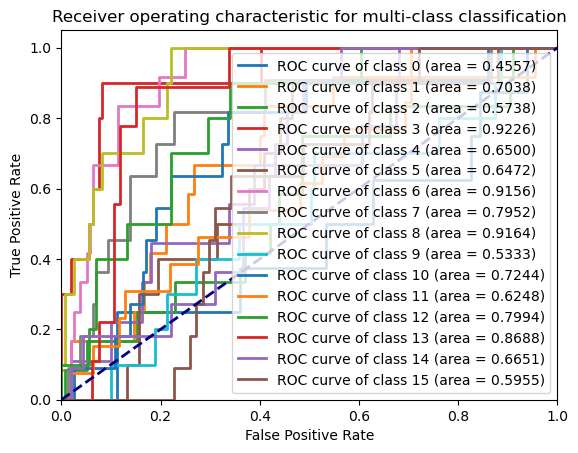

In [79]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

<font color = 'Red'>200 epoch